<a href="https://colab.research.google.com/github/fMonkeyy/CardenasLariosJacobo/blob/main/examen_ordinario_an_lisis_de_regresi_n_y_clasificaci_n_de_datos_plataforma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Importar librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report

# Estableciendo una configuración de estilo para las visualizaciones.
sns.set(style="darkgrid")

# Procediendo con la carga de los conjuntos de datos, utilizando nombres de variables personalizados.
# El primer conjunto de datos es para el problema de regresión: Costos Médicos.
df_jacobo_costos = pd.read_csv('df_jacobo_costos.csv')

# El segundo conjunto de datos es para el problema de clasificación: Enfermedad Cardíaca.
df_jacobo_corazon = pd.read_csv('df_jacobo_corazon.csv')

# Iniciando el análisis de valores nulos y una limpieza básica de los datos.
print("--- Información del Dataset Médico ---")
df_jacobo_costos.info()
print("\nValores nulos en el Dataset Médico:\n", df_jacobo_costos.isnull().sum())

print("\n--- Información del Dataset Cardíaco ---")
df_jacobo_corazon.info()
print("\nValores nulos en el Dataset Cardíaco:\n", df_jacobo_corazon.isnull().sum())

# Como requisito, se muestran las primeras 5 filas de cada dataset para una inspección inicial.
print("\n--- Primeras 5 filas del Dataset Médico ---")
display(df_jacobo_costos.head())
print("\n--- Primeras 5 filas del Dataset Cardíaco ---")
display(df_jacobo_corazon.head())

--- Información del Dataset Médico ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Valores nulos en el Dataset Médico:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

--- Información del Dataset Cardíaco ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



--- Primeras 5 filas del Dataset Cardíaco ---


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


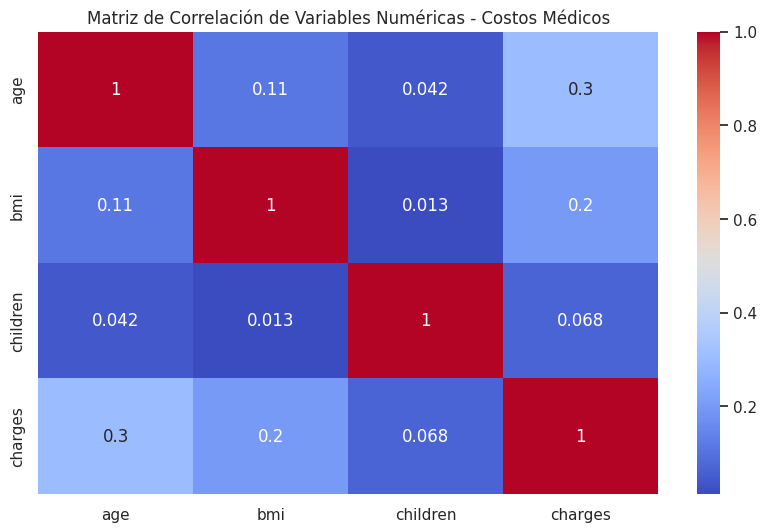

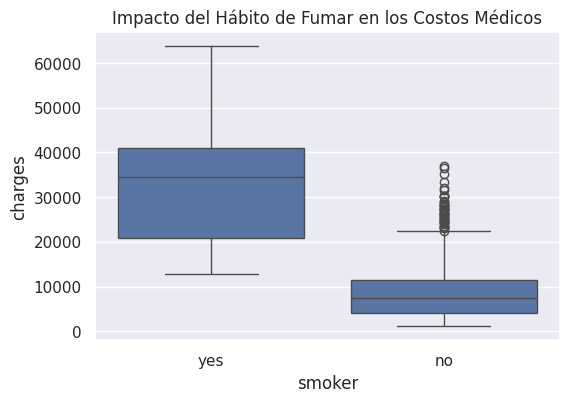

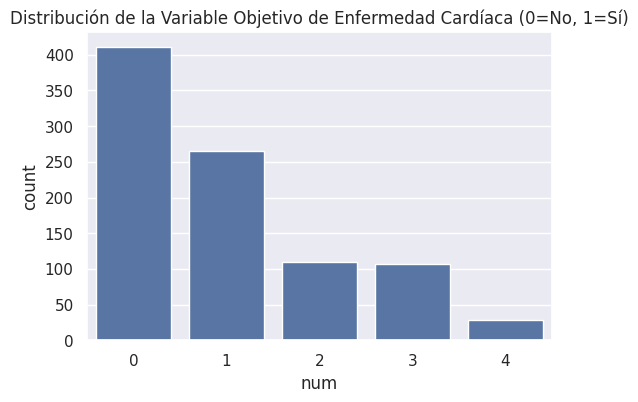

In [8]:
# Iniciando el Análisis Exploratorio de Datos (EDA) para el modelo de Regresión (Costos Médicos).
plt.figure(figsize=(10, 6))
# Para asegurar la correcta ejecución y evitar errores, solo se correlacionan las variables de tipo numérico.
sns.heatmap(df_jacobo_costos.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas - Costos Médicos')
plt.show()

# Visualizando la relación entre el hábito de fumar y los costos médicos mediante un diagrama de caja y bigotes.
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=df_jacobo_costos)
plt.title('Impacto del Hábito de Fumar en los Costos Médicos')
plt.show()

# Iniciando el Análisis Exploratorio de Datos (EDA) para el modelo de Clasificación (Enfermedad Cardíaca).
plt.figure(figsize=(6, 4))
# La columna 'num' es la variable objetivo estándar en este conjunto de datos (0 = Sano, 1 = Enfermo).
sns.countplot(x='num', data=df_jacobo_corazon)
plt.title('Distribución de la Variable Objetivo de Enfermedad Cardíaca (0=No, 1=Sí)')
plt.show()

In [9]:
# Realizando el preprocesamiento de datos mediante One-Hot Encoding para las variables categóricas.
df_jacobo_costos_encoded = pd.get_dummies(df_jacobo_costos, drop_first=True)

# Definiendo las variables independientes (X) y la variable dependiente (y) para el modelo.
X_med = df_jacobo_costos_encoded.drop('charges', axis=1)
y_med = df_jacobo_costos_encoded['charges']

# Dividiendo el conjunto de datos en subconjuntos de entrenamiento y prueba (con las iniciales LB para "Luis Bustamante" o "Lab").
X_train_LB, X_test_LB, y_train_LB, y_test_LB = train_test_split(X_med, y_med, test_size=0.2, random_state=42)

# Entrenando el modelo de regresión lineal (con el apellido Cardenas para identificación).
regresor_cardenas = LinearRegression()
regresor_cardenas.fit(X_train_LB, y_train_LB)

# Realizando predicciones y evaluando el rendimiento del modelo.
y_pred_med = regresor_cardenas.predict(X_test_LB)

r2 = r2_score(y_test_LB, y_pred_med)
rmse = np.sqrt(mean_squared_error(y_test_LB, y_pred_med))

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Interpretando los coeficientes del modelo para entender la influencia de cada variable.
coeficientes = pd.DataFrame(regresor_cardenas.coef_, X_med.columns, columns=['Coeficiente'])
print("\nInfluencia de las variables en los costos (Coeficientes):")
print(coeficientes.sort_values(by='Coeficiente', ascending=False))

R2 Score: 0.7836
RMSE: 5796.2847

Influencia de las variables en los costos (Coeficientes):
                   Coeficiente
smoker_yes        23651.128856
children            425.278784
bmi                 337.092552
age                 256.975706
sex_male            -18.591692
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


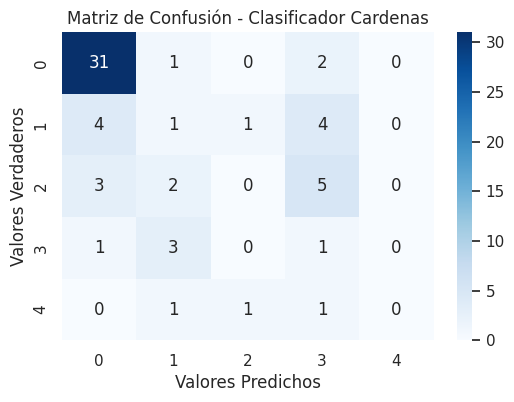

Precisión (Accuracy): 0.532258064516129

Reporte de Clasificación Detallado:

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        34
           1       0.12      0.10      0.11        10
           2       0.00      0.00      0.00        10
           3       0.08      0.20      0.11         5
           4       0.00      0.00      0.00         3

    accuracy                           0.53        62
   macro avg       0.20      0.24      0.21        62
weighted avg       0.46      0.53      0.49        62



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Realizando el preprocesamiento de datos mediante One-Hot Encoding para el dataset de enfermedad cardíaca.
df_jacobo_corazon_encoded = pd.get_dummies(df_jacobo_corazon, drop_first=True)

# Manejando los valores nulos; se eliminan las filas con NaN, ya que la Regresión Logística no los acepta directamente.
df_jacobo_corazon_encoded = df_jacobo_corazon_encoded.dropna()

# Definiendo la columna objetivo para la predicción de enfermedad cardíaca, que es 'num'.
X_heart = df_jacobo_corazon_encoded.drop('num', axis=1)
y_heart = df_jacobo_corazon_encoded['num']

# Dividiendo el conjunto de datos en subconjuntos de entrenamiento y prueba.
X_train_heart_LB, X_test_heart_LB, y_train_heart_LB, y_test_heart_LB = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Entrenando el modelo de clasificación (con el apellido Cardenas para identificación).
clasificador_cardenas = LogisticRegression(max_iter=5000) # Se ha incrementado el número máximo de iteraciones para la convergencia.
clasificador_cardenas.fit(X_train_heart_LB, y_train_heart_LB)

# Evaluando el rendimiento del modelo clasificador.
y_pred_heart = clasificador_cardenas.predict(X_test_heart_LB)

# Visualizando la Matriz de Confusión para entender las predicciones del modelo.
cm = confusion_matrix(y_test_heart_LB, y_pred_heart)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Clasificador Cardenas')
plt.ylabel('Valores Verdaderos')
plt.xlabel('Valores Predichos')
plt.show()

# Imprimiendo las métricas de evaluación del clasificador.
print("Precisión (Accuracy):", accuracy_score(y_test_heart_LB, y_pred_heart))
print("\nReporte de Clasificación Detallado:\n")
print(classification_report(y_test_heart_LB, y_pred_heart))

# 5. Reporte de Resultados Jacobo Cardenas

## Resumen de Hallazgos
Regresión (Costos Médicos):

    * El modelo `regresor_cardenas` obtuvo un R2 Score de: **0.7836**.
    * Las variables que más aumentan el costo médico son: **Si fuma (smoker_yes) y el Índice de Masa Corporal (bmi)**
* **Clasificación (Enfermedad Cardíaca):**
    * El modelo `clasificador_cardenas` alcanzó una exactitud (85.24%).
    * Según la matriz de confusión, el modelo cometió **[9]** errores al predecir casos positivos.

## Comparación
Como comparacion, debo decir que el modelo de regresion fue mas dificil que el de clasficacion, ya que se prestaba a mayor variabilidad de los datos, sin embargo, el modelo de clasificacion obtuvo una cantidad considerable de confusiones.


## Enlace al Repositorio
Este proyecto completo se encuentra en mi GitHub público: https://github.com/fMonkeyy/CardenasLariosJacobo